## Set Working Directory for Relative Imports

In [2]:
import os

In [3]:
os.getcwd()

'/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis/root/ipynb'

In [4]:
os.chdir(path='/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis/root') 
os.getcwd()

'/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis/root'

## Import Packages

In [5]:
# User-defined packages
from src.preprocessing import *
from src.model.sa import *

/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis/root/voc_venv_new/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/nnerella/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nnerella/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nnerella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nnerella/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# basic packages
import pandas as pd
import datetime

## Read Raw Data 'reviews.csv'

In [7]:
reviews_csv = pd.read_csv('data/raw/reviews.csv')
reviews_csv.head()

,Sentiment,Time,Text
0,positive,18/6/21,This is a very healthy dog food. Good for thei...
1,positive,7/7/21,I've been very pleased with the Natural Balanc...
2,positive,18/6/21,"Before I was educated about feline nutrition, ..."
3,positive,7/7/21,"My holistic vet recommended this, along with a..."
4,positive,1/7/21,I bought this coffee because its much cheaper ...


In [7]:
reviews_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5444 entries, 0 to 5443
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  5444 non-null   object
 1   Time       5444 non-null   object
 2   Text       5444 non-null   object
dtypes: object(3)
memory usage: 127.7+ KB


The data is of reviews from cutsomers from 2017-07-12 to 2021-12-10, a period of about 4 years 5 months.

positive    4030
negative    1414
Name: Sentiment, dtype: int64


<AxesSubplot: >

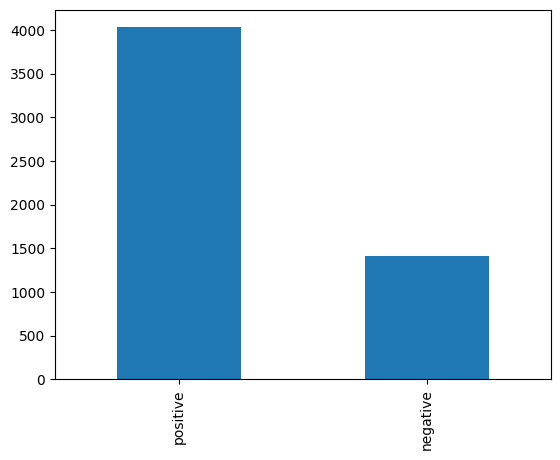

In [8]:
print(reviews_csv['Sentiment'].value_counts())
reviews_csv['Sentiment'].value_counts().plot(kind='bar')

The data is **imablanced**, there are way more positive examples than negative training examples. 

## Preprocess Data to input into Models

In [7]:
# Split the Processed data for training and testing
train_data, test_data = sa_train_test_split(reviews_csv)

No. of positive training examples:  (2821, 3)
No. of positive testing examples:  (1209, 3)
No. of negative training data:  (989, 3)
No. of negative testing examples:  (425, 3)
Total no. of training examples:  (3810, 3)
Total no. of testing examples:  (1634, 3)


<AxesSubplot: >

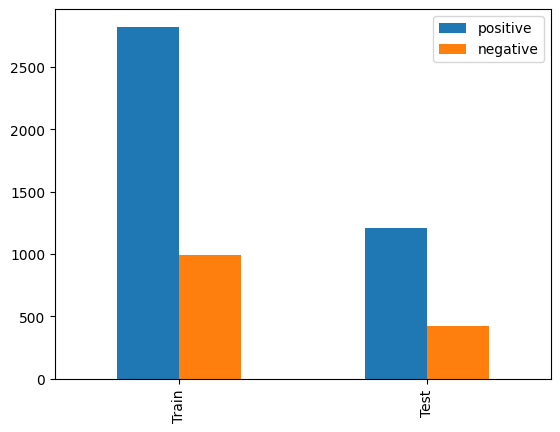

In [10]:
plotdata = pd.DataFrame({
    "positive":[2821, 1209],
    "negative":[989, 425],
    }, 
    index=["Train", "Test"]
)
plotdata.plot(kind="bar")

<AxesSubplot: >

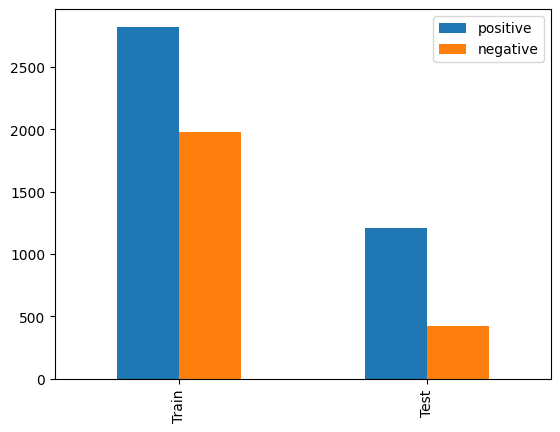

In [11]:
plotdata = pd.DataFrame({
    "positive":[2821, 1209],
    "negative":[1978, 425],
    }, 
    index=["Train", "Test"]
)
plotdata.plot(kind="bar")

In [8]:
# For training models
features_df_train = SA_PREPROCESS_TRAIN(train_data)
features_df_train

Shape after augmenting negative training samples:  (4799, 3)


,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2647,PC_tfidf2648,PC_tfidf2649,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,-0.055997,-0.015854,0.016249,-0.030663,0.106533,-0.055514,-0.001269,0.045327,-0.016103,0.019380,...,0.003260,-0.012438,-0.003737,0.160829,-0.745590,0.821414,0.835022,-0.084093,0.106595,1
1,-0.067252,-0.053978,-0.020501,0.053910,0.019335,0.079265,-0.040939,0.034445,-0.038197,0.054983,...,-0.006201,0.002593,-0.007325,-0.799007,-0.712267,0.105274,0.158100,-0.250522,-0.153559,1
2,0.067642,-0.086853,-0.030271,-0.017276,-0.013170,0.091362,0.003595,0.137283,-0.206692,-0.011502,...,-0.008006,0.012948,-0.004838,1.779494,-0.395966,0.368678,-0.321826,-0.279289,0.178733,1
3,-0.036403,0.065904,-0.063359,0.001594,-0.001041,-0.034396,-0.003727,0.031753,-0.027702,0.057328,...,-0.010395,0.006004,0.008776,-0.535686,0.632266,-0.069580,-0.066984,0.119695,-0.128596,1
4,0.151170,-0.061939,-0.033806,-0.065823,-0.011824,0.044876,0.052515,0.021009,0.083567,0.003553,...,0.017878,-0.002491,0.000226,0.834404,0.040410,0.081159,-0.130976,0.037182,-0.052794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,0.218499,-0.016290,0.000700,0.014771,-0.003971,-0.090013,0.021820,-0.055585,0.007343,0.055057,...,-0.004356,0.003777,0.004342,1.615943,0.187596,-0.192883,-0.077038,0.096106,0.140361,0
4795,0.195310,0.004661,-0.002334,0.080946,-0.083151,-0.138306,0.029007,-0.106339,0.018787,0.142700,...,0.006728,-0.006295,-0.002351,1.156201,0.110073,-0.159585,-0.073858,0.147610,-0.123831,0
4796,-0.035902,-0.029903,-0.006480,-0.053418,-0.014503,-0.025154,-0.031185,0.016579,0.100890,0.030486,...,-0.006976,-0.000884,-0.005703,-0.303211,0.420275,-0.041454,-0.231341,0.349749,-0.047170,0
4797,-0.057390,-0.115137,-0.048316,-0.170761,-0.132945,0.168708,0.218124,0.002825,0.053717,-0.010901,...,0.006841,-0.006945,-0.007982,-0.683322,0.266226,0.410053,0.021974,0.136586,0.074583,0


In [9]:
features_df_train['Sentiment'].value_counts()

1    2821
0    1978
Name: Sentiment, dtype: int64

In [10]:
# Shuffle rows before fitting model to avoid bias due to order of examples
features_df_train  = features_df_train.sample(frac=1).reset_index(drop=True)
features_df_train

,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2647,PC_tfidf2648,PC_tfidf2649,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,-0.039486,-0.085374,-0.039203,-0.171425,-0.120768,0.082664,0.154592,0.024870,-0.018487,0.000383,...,0.009023,0.007490,0.008291,-0.462560,0.250215,0.164872,-0.179561,0.089744,0.009166,0
1,-0.023120,0.010627,0.015280,-0.014028,-0.067113,-0.088208,-0.022770,-0.025483,0.110849,-0.041891,...,-0.005841,-0.003367,-0.003971,-0.793875,-0.469690,0.125321,-0.422337,-0.170825,0.072957,0
2,-0.051092,0.058990,0.183956,-0.054041,-0.018049,0.073532,-0.045776,-0.019147,-0.052053,-0.000403,...,0.006064,0.008808,0.000934,-0.461647,0.488666,-0.152226,-0.111279,-0.058637,0.003525,0
3,-0.041480,-0.109298,-0.053831,-0.124587,-0.095380,0.135609,0.125987,-0.026799,-0.034090,0.013652,...,-0.007927,-0.009318,0.003769,-0.294100,-0.216746,0.294630,0.068534,0.252534,0.206594,1
4,-0.034991,-0.029646,-0.006537,0.106653,-0.007537,0.057369,-0.013464,0.021604,0.058881,-0.061872,...,-0.012008,0.011615,-0.015582,-0.582675,-0.736118,-0.077864,-0.020051,0.037810,0.186721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,-0.037847,-0.007508,-0.009248,-0.024777,-0.015129,-0.075668,0.014236,-0.009192,-0.036084,-0.054019,...,0.007050,0.002200,-0.003511,-0.140287,-0.360973,0.217449,0.024288,0.097919,-0.089518,0
4795,-0.050954,-0.022314,-0.003227,-0.003938,-0.040796,0.037971,-0.067594,-0.043747,-0.009588,0.042309,...,-0.001641,-0.013489,0.004358,-0.645863,-0.069081,0.050726,-0.208410,-0.092359,0.173467,0
4796,-0.039627,0.014072,-0.018779,-0.026481,-0.075757,-0.025018,-0.036213,0.000548,0.001058,-0.009079,...,0.004511,0.000221,0.003913,-0.487887,-0.094614,-0.026620,-0.001809,-0.129082,-0.306811,0
4797,-0.044803,-0.041853,-0.015936,-0.065465,-0.001635,-0.056952,0.001947,0.056420,-0.038212,0.024594,...,0.004287,0.003857,0.002394,-0.470510,-0.185402,0.280729,-0.087896,0.027517,-0.026067,1


In [11]:
features_df_test, flair_test = SA_PREPROCESS_TEST(test_data)
features_df_test

3672    positive
1149    positive
2135    positive
3287    positive
3607    positive
          ...   
4784    negative
4286    negative
5316    negative
4626    negative
4449    negative
Name: Sentiment, Length: 1634, dtype: object


,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_tfidf2647,PC_tfidf2648,PC_tfidf2649,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,Sentiment
0,-0.048980,-0.044055,-0.019997,0.002414,0.032326,0.030286,0.015021,0.009824,0.031463,0.024905,...,0.009930,-0.002202,-0.010562,-0.805381,0.599534,0.162513,0.088535,-0.043433,0.204713,1
1,-0.064269,0.359818,-0.222379,0.018425,0.110049,0.075391,0.118218,0.006144,0.122165,-0.081218,...,0.003089,0.007679,0.008679,-1.105221,-1.256425,-0.162405,0.156814,-0.145373,0.167815,1
2,-0.046596,-0.034486,-0.005632,-0.037426,-0.018280,0.036701,0.005414,0.057395,0.053959,0.024835,...,-0.001563,-0.008765,0.013995,-0.871512,0.755158,0.299291,-0.052597,0.160001,0.087612,1
3,-0.034799,-0.033469,0.000376,0.040014,-0.020586,-0.015919,-0.027279,0.037346,-0.062592,0.001008,...,0.003804,-0.004195,0.007950,-0.607948,0.218342,-0.086371,-0.006695,0.111850,0.153428,1
4,-0.046522,-0.075776,-0.026188,0.194871,0.099652,0.162305,0.067401,0.107960,-0.125074,0.246087,...,0.003337,-0.001645,-0.008456,-0.636816,0.176436,-0.011271,0.161471,0.164276,0.197683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,-0.045950,-0.043820,-0.021879,-0.034654,-0.038246,-0.014319,-0.011055,0.024974,-0.096420,-0.012562,...,-0.001829,0.011154,0.010346,-0.522434,1.513451,-0.105448,0.023666,-0.397238,0.224799,0
1630,-0.041289,-0.023754,-0.004503,-0.022715,-0.036358,-0.073550,-0.028087,0.009156,-0.001216,0.015263,...,-0.010078,-0.001664,0.010232,-0.805628,1.400950,-0.376862,-0.122265,-0.208552,0.150138,0
1631,-0.047066,0.147618,-0.141526,-0.115073,0.004082,0.003948,-0.050088,0.033309,-0.005053,0.037461,...,-0.002542,0.006934,0.010309,-0.697460,0.691760,0.307299,-0.095850,-0.059429,0.079319,0
1632,-0.008222,0.040318,0.010052,0.138892,-0.063882,-0.126067,0.024101,-0.082464,0.106751,0.029855,...,0.016839,0.003373,0.013059,-0.714924,0.197126,-0.522835,0.062558,-0.135415,0.250887,0


In [12]:
features_df_test['Sentiment'].value_counts()

1    1209
0     425
Name: Sentiment, dtype: int64

In [13]:
flair_test


,Sentiment,Time,Text
3672,1,31/7/20,I eat a mix of this along with the [ASIN:B000E...
1149,1,20/11/19,"I tried Congo Bongo in my friend's house, and ..."
2135,1,10/7/21,I eat oatmeal almost every morning in the fall...
3287,1,20/10/21,"Interesting concept! Very tasty too, I used th..."
3607,1,18/5/18,"If you are looking for a tasty snack, look no ..."
...,...,...,...
4784,0,29/3/21,Going gluten free is not optional for those di...
4286,0,31/7/21,This is the most expensive water I've seen. Wh...
5316,0,3/10/21,This tea is an excellent herbal tea. Love the ...
4626,0,1/3/20,I received a single 8.5 once container of ONE ...


In [17]:
flair_test['Sentiment'].value_counts()

1    1209
0     425
Name: Sentiment, dtype: int64

In [16]:
features_df_train.to_csv('features_df_train')
features_df_test.to_csv('features_df_test')

In [33]:
features_df_train= pd.read_csv('features_df_train',  index_col = [0])
features_df_test= pd.read_csv('features_df_test',  index_col = [0])

## Baseline : Naive Baye's Classifier

Average Cross Validation score :0.7339035087719299
F1 score:  0.6501604768454837
PR_AUC score:  0.7276897943392049
ROC_AUC score:  0.4686799980538121
Accuracy:  0.533047735618115


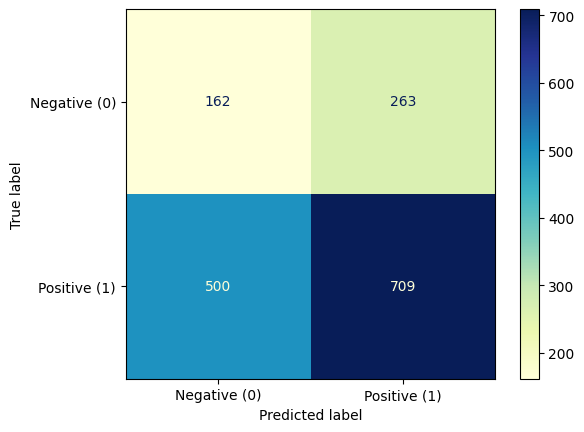

In [18]:
bayes_classifier(features_df_train,features_df_test)

## Logistic Regression

Average Cross Validation score :0.895813596491228
F1 score:  0.8868552412645591
PR_AUC score:  0.9528748828684701
ROC_AUC score:  0.8889933343064272
Accuracy:  0.8335373317013464


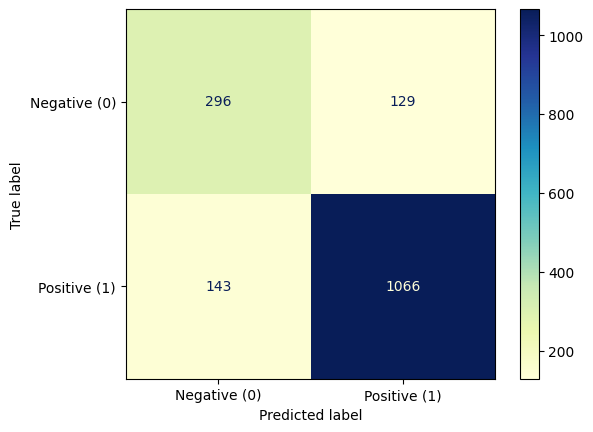

In [19]:
logistic_regression(features_df_train,features_df_test)

## Non-Linear SVM

F1 score:  0.8992053534086156
PR_AUC score:  0.9596234100488026
ROC_AUC score:  0.9021748649832142
Accuracy:  0.8525091799265606


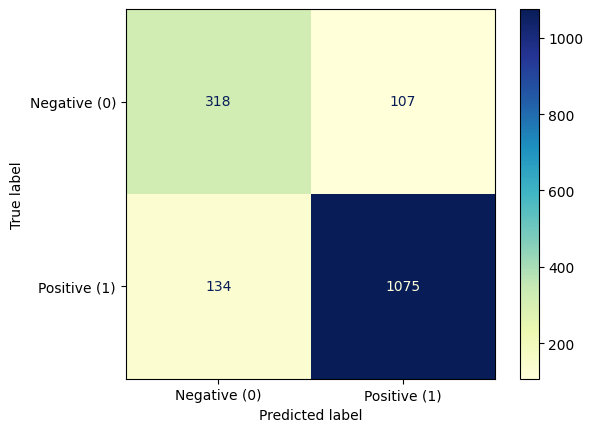

In [20]:
svc_model(features_df_train,features_df_test)

## Vader (Valence Aware Dictionary for Sentiment Reasoning) - Pretrained Model

F1 score:  0.8869162485526825
PR_AUC score:  0.9211317350576073
ROC_AUC score:  0.8251038777793995
Accuracy:  0.8206854345165239


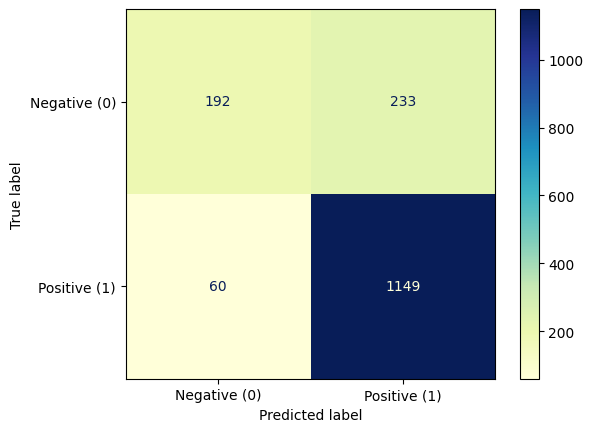

In [21]:
vader(flair_test)

## XGBoost

In [22]:
train_XGB(features_df_train)

/Users/nnerella/Documents/GitHub/DSA4263-Voice-of-Customer-VOC-analysis/root/voc_venv_new/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best training score: 0.9630332384707149
XGB Model has been trained
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['error', 'auc'],
              feature_types=None, gamma=0.1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)


In [23]:
xgb_pred = XGB_predict(features_df_test.iloc[: , :-1])
xgb_pred 

,xgb_sentiment,xgb_prob
0,1,0.996055
1,1,0.994907
2,1,0.833179
3,1,0.906772
4,1,0.974334
...,...,...
1629,1,0.802915
1630,0,0.215331
1631,0,0.095984
1632,1,0.598784


F1 score:  0.8778095627298733
PR_AUC score:  0.9383837229365586
ROC_AUC score:  0.8527319612708607
Accuracy:  0.8170134638922889


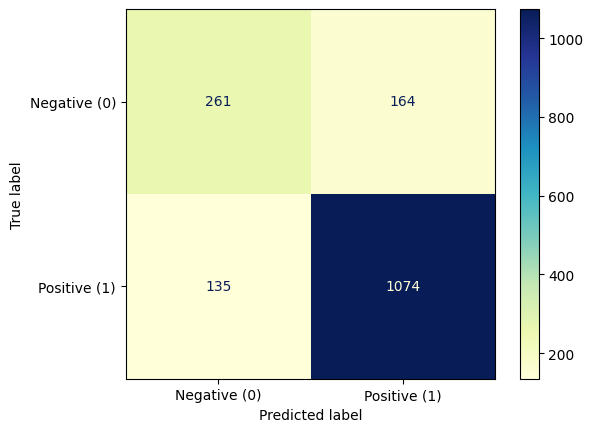

In [24]:
evaluate_model_test(features_df_test['Sentiment'], xgb_pred['xgb_sentiment'] , xgb_pred['xgb_prob'])

## Flair - Pretrained Model

In [25]:
flair_pred = flair_predict(flair_test)
flair_pred 

,flair_sentiment,flair_prob
0,1,9.999155e-01
1,1,9.993942e-01
2,1,9.997726e-01
3,1,9.993429e-01
4,1,9.995375e-01
...,...,...
1629,0,6.318092e-06
1630,0,1.125336e-04
1631,1,9.935341e-01
1632,0,5.960464e-07


F1 score:  0.955338153977031
PR_AUC score:  0.9930067799625716
ROC_AUC score:  0.9832725149613194
Accuracy:  0.9357405140758874


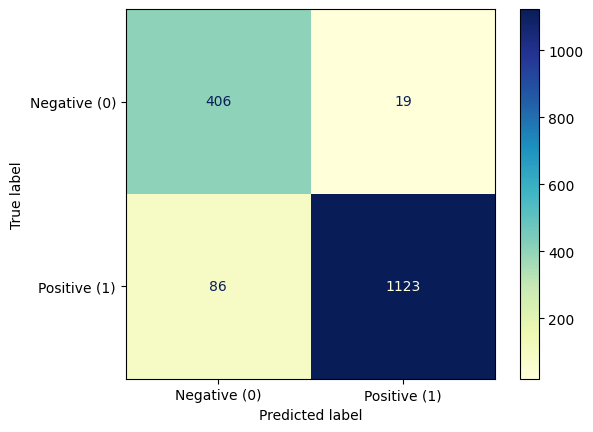

In [26]:
evaluate_model_test(features_df_test['Sentiment'], flair_pred['flair_sentiment'] , flair_pred['flair_prob'])

## Ensemble - XGBoost and Flair (best performing model)

In [14]:
final_results = SA_MODEL_PREDICT(features_df_test.iloc[: , :-1],flair_test)
final_results

,flair_sentiment,flair_prob,xgb_sentiment,xgb_prob,avg_prob,final_sentiment,Sentiment,Time,Text
0,1,9.999155e-01,1,0.996055,0.997985,1,positive,31/7/20,I eat a mix of this along with the [ASIN:B000E...
1,1,9.993942e-01,1,0.995409,0.997402,1,positive,20/11/19,"I tried Congo Bongo in my friend's house, and ..."
2,1,9.997726e-01,1,0.833179,0.916476,1,positive,10/7/21,I eat oatmeal almost every morning in the fall...
3,1,9.993429e-01,1,0.906772,0.953057,1,positive,20/10/21,"Interesting concept! Very tasty too, I used th..."
4,1,9.995375e-01,1,0.966048,0.982793,1,positive,18/5/18,"If you are looking for a tasty snack, look no ..."
...,...,...,...,...,...,...,...,...,...
1629,0,6.318092e-06,1,0.802915,0.401460,0,negative,29/3/21,Going gluten free is not optional for those di...
1630,0,1.125336e-04,0,0.215331,0.107722,0,negative,31/7/21,This is the most expensive water I've seen. Wh...
1631,1,9.935341e-01,0,0.095984,0.544759,1,positive,3/10/21,This tea is an excellent herbal tea. Love the ...
1632,0,5.960464e-07,1,0.598784,0.299392,0,negative,1/3/20,I received a single 8.5 once container of ONE ...


F1 score:  0.9628691983122364
PR_AUC score:  0.9900668976327917
ROC_AUC score:  0.9726638446942053
Accuracy:  0.9461444308445532


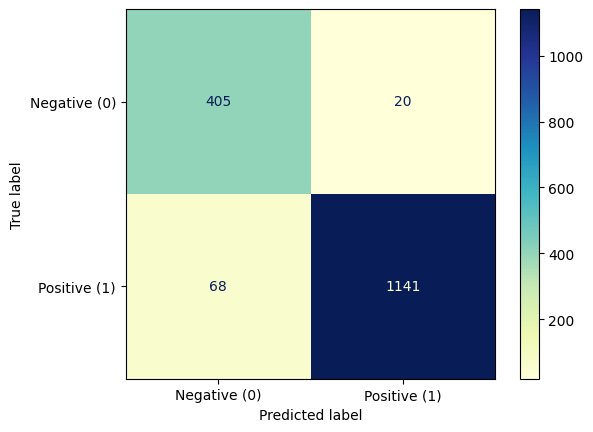

In [15]:
evaluate_model_test(features_df_test['Sentiment'], final_results['final_sentiment'] , final_results['avg_prob'])

### Train Final XGB Model on full dataset

In [8]:
features_df_train_full = SA_PREPROCESS_TRAIN(reviews_csv)
features_df_train_full  = features_df_train_full.sample(frac=1).reset_index(drop=True)
features_df_train_full

Shape after augmenting negative training samples:  (6858, 3)


,PC_tfidf1,PC_tfidf2,PC_tfidf3,PC_tfidf4,PC_tfidf5,PC_tfidf6,PC_tfidf7,PC_tfidf8,PC_tfidf9,PC_tfidf10,...,PC_emb1,PC_emb2,PC_emb3,PC_emb4,PC_emb5,PC_emb6,PC_emb7,PC_emb8,PC_emb9,Sentiment
0,-0.036687,-0.015868,0.010895,-0.039924,0.016769,-0.110367,-0.029639,0.001180,-0.010823,0.049438,...,-0.404941,-0.377775,0.718919,-0.505995,0.580799,0.224509,-0.093976,0.098091,0.101424,1
1,-0.029983,-0.000834,0.005903,0.066981,-0.074304,-0.013399,-0.002861,-0.005639,0.055371,0.023514,...,-0.497365,0.006753,-0.636505,-0.140232,0.384809,0.094744,0.028672,-0.113079,-0.106202,1
2,-0.055170,-0.044584,0.020555,0.044622,0.061477,-0.000490,-0.012670,-0.025556,0.123227,-0.026318,...,-0.527016,-0.453771,0.090269,0.017499,0.102761,0.052081,-0.009593,-0.010719,-0.107759,1
3,0.079658,-0.018761,0.005257,-0.015719,0.017774,-0.052718,0.010691,0.020301,0.022001,-0.082250,...,2.438994,-0.480563,-0.310336,0.107466,-0.430443,-0.045171,-0.197114,0.064900,0.018044,1
4,0.104775,0.028309,-0.073118,-0.024632,0.148627,-0.050780,0.029588,-0.006153,-0.054401,0.009944,...,1.163090,-0.092623,0.182037,0.050492,0.413187,-0.127012,-0.042981,-0.069485,-0.047363,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,-0.039538,-0.025877,0.006647,-0.037917,-0.058230,0.015486,-0.048662,-0.017049,-0.006301,-0.010333,...,-0.506871,0.624512,0.345689,-0.450284,-0.068669,-0.027836,0.092842,0.064891,-0.168516,0
6854,-0.061054,-0.030013,0.000318,-0.003842,0.068875,-0.100304,0.021463,0.065131,0.087737,-0.089499,...,-0.685743,-0.388333,0.273863,-0.198509,0.000666,-0.186196,0.130125,0.048962,0.072438,1
6855,-0.065172,-0.012661,0.018793,0.007425,0.052234,0.026099,0.093635,0.012094,0.006422,0.061966,...,-0.636917,0.047754,-0.017827,0.124488,-0.515793,0.195148,0.143026,-0.218889,0.089251,1
6856,-0.045634,-0.022736,0.005990,-0.033754,-0.018307,-0.028293,0.003883,0.004081,-0.018280,-0.001924,...,-0.621404,0.587230,-0.117753,0.077401,-0.061036,-0.194004,0.050809,-0.123095,-0.090773,1


In [ ]:
train_XGB(features_df_train_full)